## Library loading

In [2]:
import scanpy as sc, anndata as ad, numpy as np, pandas as pd
from scipy import sparse
from anndata import AnnData
import warnings
import socket
import plotly.express as px
from matplotlib import pylab
from matplotlib.colors import TwoSlopeNorm
import gseapy
import sys
import yaml
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

warnings.filterwarnings('ignore')

/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/setuptools_scm/_integration/setuptools.py:30: RuntimeWarning: 
ERROR: setuptools==56.1.0 is used in combination with setuptools_scm>=8.x

Your build configuration is incomplete and previously worked by accident!
setuptools_scm requires setuptools>=61

Suggested workaround if applicable:
 - migrating from the deprecated setup_requires mechanism to pep517/518
   and using a pyproject.toml to declare build dependencies
   which are reliably pre-installed before running the build tools

  warnings.warn(


In [3]:
try:
    nb_fname = ipynbname.name()
except:
    nb_fname = "".join(os.path.basename(globals()["__vsc_ipynb_file__"]).split(".")[:-1])
    

if not os.path.exists('./figures'):
    os.makedirs('./figures')

In [4]:

outdir="./outdir"


In [5]:
%matplotlib inline

In [6]:
sc.settings.verbosity = 3         # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')
pylab.rcParams['figure.figsize'] = (10, 10)


scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.22.2 scipy==1.10.1 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


### Configure paths

In [7]:
hostRoot = "-".join(socket.gethostname().split('-')[0:2])

with open(os.path.expanduser('~')+"/paths_config.yaml", 'r') as f:
    paths = yaml.load(f, Loader=yaml.FullLoader)

#indir=paths["paths"]["indir"][hostRoot]
#projectBaseDir=paths["paths"]["projectBaseDir"][hostRoot]



In [8]:
nTopGenes = 50
Cycling_Badhuri = pd.read_excel("./tables/polCAsCycling05A_POLAROIDS_BadhuriSpace.Badhuri_Loadings.xlsx", index_col=0)
TotalGenesCycling = Cycling_Badhuri.shape[0]/2

Cycling_Badhuri = pd.concat([Cycling_Badhuri[Cycling_Badhuri["Component"] == "PC1"].head(nTopGenes), Cycling_Badhuri[Cycling_Badhuri["Component"] == "PC1"].tail(nTopGenes)])
Cygling_polCA =  pd.read_excel("./tables/polCAsCycling05A_POLAROIDS_BadhuriSpace.polCA_Loadings.xlsx", index_col=0)
Cygling_polCA = pd.concat([Cygling_polCA[Cygling_polCA["Component"] == "PC1"].head(nTopGenes), Cygling_polCA[Cygling_polCA["Component"] == "PC1"].tail(nTopGenes)])


CyclingNegativeAgreementID = list(set(Cycling_Badhuri.loc[(Cycling_Badhuri["Loading"] < 0) & (Cycling_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Cygling_polCA.loc[(Cygling_polCA["Loading"] < 0) & (Cygling_polCA["Component"] == "PC1" ), "Gene"].tolist())))
CyclingNegativeAgreement = len(set(Cycling_Badhuri.loc[(Cycling_Badhuri["Loading"] < 0) & (Cycling_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Cygling_polCA.loc[(Cygling_polCA["Loading"] < 0) & (Cygling_polCA["Component"] == "PC1" ), "Gene"].tolist())))

CyclingPositiveAgreementID = list(set(Cycling_Badhuri.loc[(Cycling_Badhuri["Loading"] >= 0) & (Cycling_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Cygling_polCA.loc[(Cygling_polCA["Loading"] >= 0) & (Cygling_polCA["Component"] == "PC1" ), "Gene"].tolist())))
CyclingPositiveAgreement = len(set(Cycling_Badhuri.loc[(Cycling_Badhuri["Loading"] >= 0) & (Cycling_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Cygling_polCA.loc[(Cygling_polCA["Loading"] >= 0) & (Cygling_polCA["Component"] == "PC1" ), "Gene"].tolist())))



###########################################################
###########################################################

Progenitors_Badhuri =  pd.read_excel("./tables/polCAsProgenitors05A_POLAROIDSBadhuriSpace.Badhuri_Loadings.xlsx", index_col=0)
TotalGenesProgenitors = Progenitors_Badhuri.shape[0]/2


Progenitors_Badhuri = pd.concat([Progenitors_Badhuri[Progenitors_Badhuri["Component"] == "PC1"].head(nTopGenes), Progenitors_Badhuri[Progenitors_Badhuri["Component"] == "PC1"].tail(nTopGenes)])
Progenitors_polCA =  pd.read_excel("./tables/polCAsProgenitors05A_POLAROIDSBadhuriSpace.polCA_Loadings.xlsx", index_col=0)
Progenitors_polCA = pd.concat([Progenitors_polCA[Progenitors_polCA["Component"] == "PC1"].head(nTopGenes), Progenitors_polCA[Progenitors_polCA["Component"] == "PC1"].tail(nTopGenes)])

ProgenitorsNegativeAgreementID = list(set(Progenitors_Badhuri.loc[(Progenitors_Badhuri["Loading"] < 0) & (Progenitors_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Progenitors_polCA.loc[(Progenitors_polCA["Loading"] < 0) & (Progenitors_polCA["Component"] == "PC1" ), "Gene"].tolist())))
ProgenitorsNegativeAgreement = len(set(Progenitors_Badhuri.loc[(Progenitors_Badhuri["Loading"] < 0) & (Progenitors_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Progenitors_polCA.loc[(Progenitors_polCA["Loading"] < 0) & (Progenitors_polCA["Component"] == "PC1" ), "Gene"].tolist())))

ProgenitorsPositiveAgreementID = list(set(Progenitors_Badhuri.loc[(Progenitors_Badhuri["Loading"] >= 0) & (Progenitors_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Progenitors_polCA.loc[(Progenitors_polCA["Loading"] >= 0) & (Progenitors_polCA["Component"] == "PC1" ), "Gene"].tolist())))
ProgenitorsPositiveAgreement = len(set(Progenitors_Badhuri.loc[(Progenitors_Badhuri["Loading"] >= 0) & (Progenitors_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Progenitors_polCA.loc[(Progenitors_polCA["Loading"] >= 0) & (Progenitors_polCA["Component"] == "PC1" ), "Gene"].tolist())))


###########################################################
###########################################################



Neurons_Badhuri =  pd.read_excel("./tables/polCAsNeurons05A_POLAROIDS_BadhuriSpace.Badhuri_Loadings.xlsx", index_col=0)
TotalGenesNeurons = Neurons_Badhuri.shape[0]/2
Neurons_Badhuri = pd.concat([Neurons_Badhuri[Neurons_Badhuri["Component"] == "PC1"].head(nTopGenes), Neurons_Badhuri[Neurons_Badhuri["Component"] == "PC1"].tail(nTopGenes)])
Neurons_polCA =  pd.read_excel("./tables/polCAsNeurons05A_POLAROIDS_BadhuriSpace.polCA_Loadings.xlsx", index_col=0)
Neurons_polCA = pd.concat([Neurons_polCA[Neurons_polCA["Component"] == "PC1"].head(nTopGenes), Neurons_polCA[Neurons_polCA["Component"] == "PC1"].tail(nTopGenes)])

NeuronsNegativeAgreementID = list(set(Neurons_Badhuri.loc[(Neurons_Badhuri["Loading"] < 0) & (Neurons_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Neurons_polCA.loc[(Neurons_polCA["Loading"] < 0) & (Neurons_polCA["Component"] == "PC1" ), "Gene"].tolist())))
NeuronsNegativeAgreement = len(set(Neurons_Badhuri.loc[(Neurons_Badhuri["Loading"] < 0) & (Neurons_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Neurons_polCA.loc[(Neurons_polCA["Loading"] < 0) & (Neurons_polCA["Component"] == "PC1" ), "Gene"].tolist())))

NeuronsPositiveAgreementID = list(set(Neurons_Badhuri.loc[(Neurons_Badhuri["Loading"] >= 0) & (Neurons_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Neurons_polCA.loc[(Neurons_polCA["Loading"] >= 0) & (Neurons_polCA["Component"] == "PC1" ), "Gene"].tolist())))
NeuronsPositiveAgreement = len(set(Neurons_Badhuri.loc[(Neurons_Badhuri["Loading"] >= 0) & (Neurons_Badhuri["Component"] == "PC1" ), "Gene"].tolist()).intersection(set(Neurons_polCA.loc[(Neurons_polCA["Loading"] >= 0) & (Neurons_polCA["Component"] == "PC1" ), "Gene"].tolist())))





In [9]:
print(CyclingNegativeAgreement)
print(CyclingPositiveAgreement)
print(ProgenitorsNegativeAgreement)
print(ProgenitorsPositiveAgreement)
print(NeuronsNegativeAgreement)
print(NeuronsPositiveAgreement)

12
19
10
17
7
6


In [10]:
AgreementDF = pd.concat([pd.DataFrame({"Number of coherent genes":[CyclingNegativeAgreement],"Type":"Negative PC1 loadings (PFC/Proximal)","Cell type":"Cycling"}),
pd.DataFrame({"Number of coherent genes":[CyclingPositiveAgreement],"Type":"Positive PC1 loadings (Temp/Distal)","Cell type":"Cycling"}),
pd.DataFrame({"Number of coherent genes":[ProgenitorsNegativeAgreement],"Type":"Negative PC1 loadings (PFC/Proximal)","Cell type":"Progenitors"}),
pd.DataFrame({"Number of coherent genes":[ProgenitorsPositiveAgreement],"Type":"Positive PC1 loadings (Temp/Distal)","Cell type":"Progenitors"}),
pd.DataFrame({"Number of coherent genes":[NeuronsNegativeAgreement],"Type":"Negative PC1 loadings (PFC/Proximal)","Cell type":"Neurons"}),
pd.DataFrame({"Number of coherent genes":[NeuronsPositiveAgreement],"Type":"Positive PC1 loadings (Temp/Distal)","Cell type":"Neurons"})], ignore_index=True)
AgreementDF["Number of coherent genes"]

0    12
1    19
2    10
3    17
4     7
5     6
Name: Number of coherent genes, dtype: int64

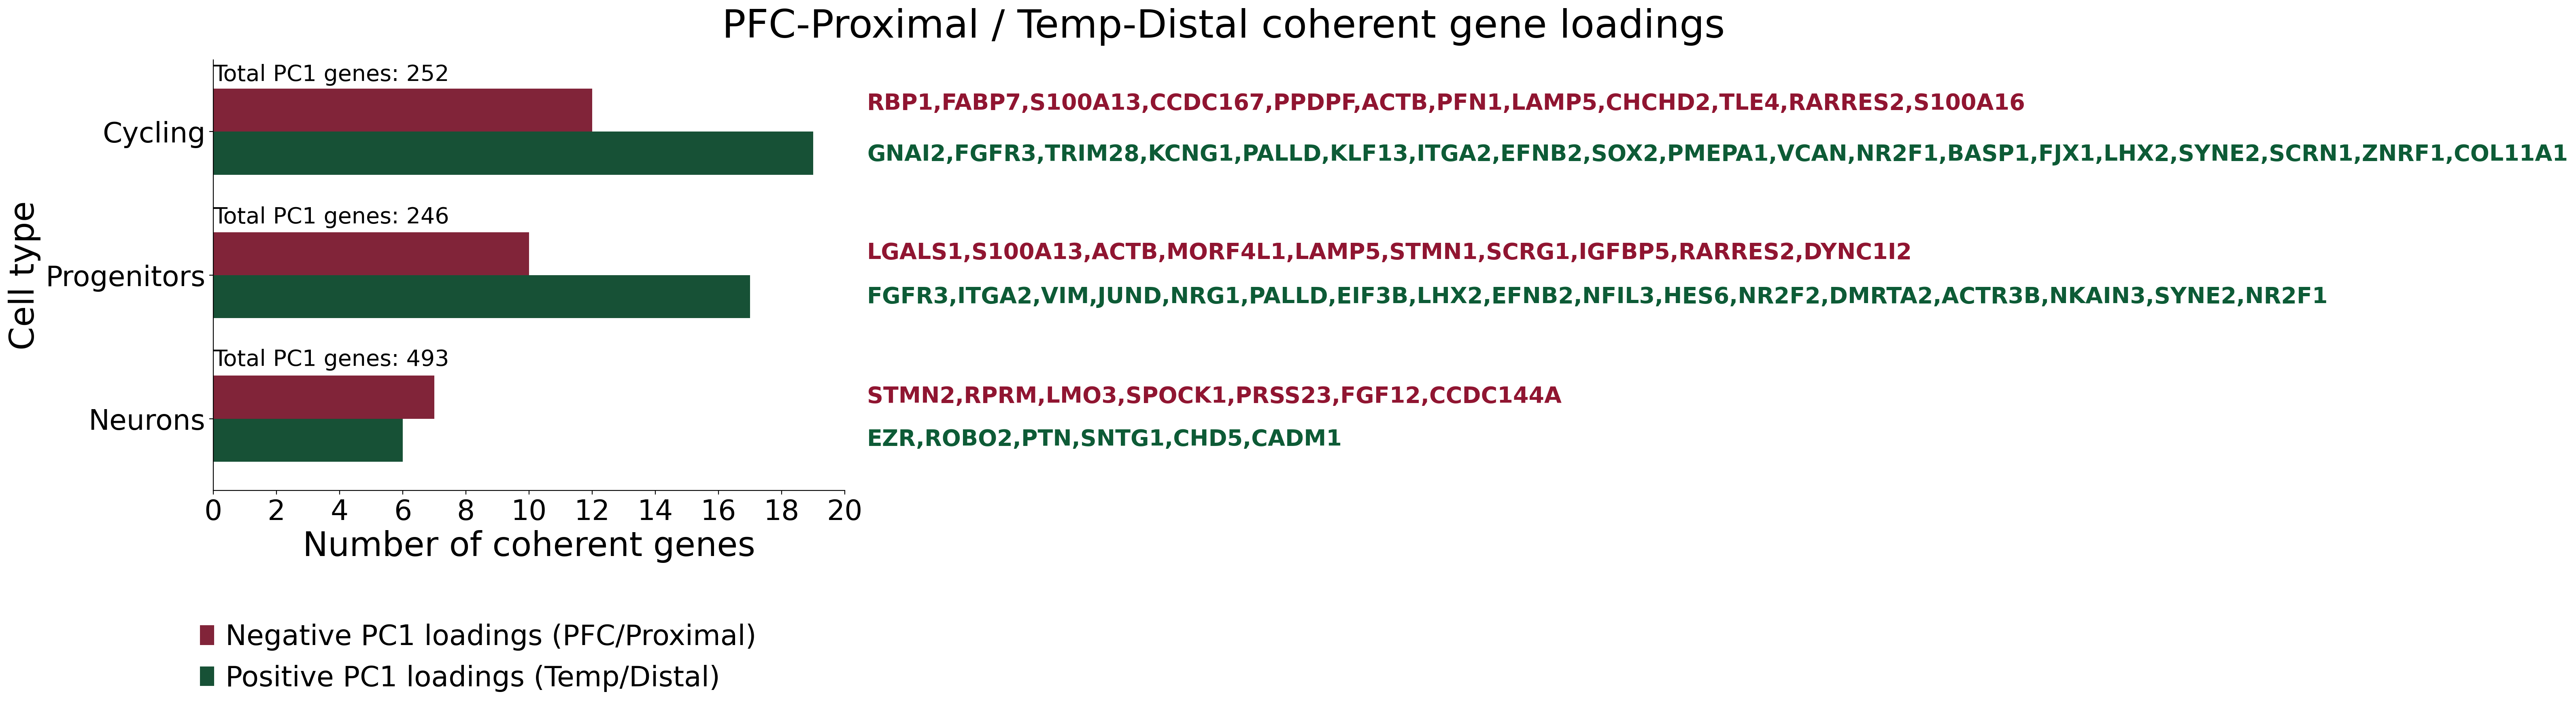

In [20]:
import matplotlib.patches as mpatches

TotalGenesDict = pd.DataFrame({"Total PC1 genes Cycling":TotalGenesCycling,
                  "Total PC1 genes Progenitors":TotalGenesProgenitors,
                  "Total PC1 genes Neurons":TotalGenesNeurons}, index=[0]).T

TotalGenesDict["yLoc"] = [-.4,.6,1.6]
TotalGenesDict["xLoc"] = [0,0,0]


AgreementIDsDict = pd.DataFrame({"Agreement Negative Cycling":",".join(CyclingNegativeAgreementID),
                  "Agreement Positive Cycling":",".join(CyclingPositiveAgreementID),
                  "Agreement Negative Progenitors":",".join(ProgenitorsNegativeAgreementID),
                  "Agreement Positive Progenitors":",".join(ProgenitorsPositiveAgreementID),
                  "Agreement Negative Neurons":",".join(NeuronsNegativeAgreementID),
                  "Agreement Positive Neurons":",".join(NeuronsPositiveAgreementID)}, index=[0]).T

AgreementIDsDict["yLoc"] = [-.20,.16,.85,1.16,1.86,2.16]
AgreementIDsDict["xLoc"] = [20,20,20,20,20,20]



sns.axes_style("ticks",{'axes.grid' : False})
fig, ax = plt.subplots(1,1, figsize=(10, 7), sharey=True, gridspec_kw={'wspace': 0})
sns.barplot(data=AgreementDF, x='Number of coherent genes', y='Cell type',hue="Type",palette={"Negative PC1 loadings (PFC/Proximal)":"#901531","Positive PC1 loadings (Temp/Distal)":"#0D5B36"},width=0.6,
            ci=False, orient='horizontal', dodge=True, ax=ax)
ax.tick_params(axis='y', labelright=True, right=True)
ax.set_xticks(list(range(0,AgreementDF["Number of coherent genes"].max()+2 if AgreementDF["Number of coherent genes"].max()%2 == 0 else AgreementDF["Number of coherent genes"].max()+3,2)))
ax.set_title(''+'PFC-Proximal / Temp-Distal coherent gene loadings', fontsize=35, pad=20,x=1.6)
ax.set_xlabel('Number of coherent genes')
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)

ax.grid(False)
ax.tick_params(labelright=False, right=False)
ax.tick_params(labelsize=25)

sns.despine()

plt.legend(bbox_to_anchor= (.9,-.25), frameon=False, fontsize=25,
              title_fontsize=25)


for i, point in TotalGenesDict.iterrows():
	ax.annotate(str("Total PC1 genes: {}".format(int(point[0]))), va="center", 
				xy=(point["xLoc"], point["yLoc"]), 
				xytext=(point["xLoc"], point["yLoc"]),
				textcoords='offset points',fontsize=20)

for i, point in AgreementIDsDict.iterrows():
	ax.annotate(str(point[0]), va="center", 
				xy=(point["xLoc"], point["yLoc"]), 
				xytext=(point["xLoc"], point["yLoc"]),
				textcoords='offset points',fontsize=20, color="#0D5B36" if "Positive" in point.name else "#901531", weight='bold')



fig.savefig("./figures/AgreementBarplot_top50.png", bbox_inches='tight')
